In [1]:
import os 
import sys
sys.path.append("/home/martin/Work/Qutip/modules")
import math
import numpy as np
import Interferometry as In
import Utility as Ut
import parameters as pm
from qutip import Qobj, basis, sigmax, Options

In [41]:
n     = 10
MgH   = {'B': 2.88*10**(-5.), 'Da': 16.20, 'D': 1.18}
eps   = 0.000
P     = 2.67
FWHM  = 100.
t0    = 0.
sigma = Ut.sigmaFromFWHM(FWHM)
I0    = Ut.getI0(P, sigma, MgH['Da'])
print('I0 =', I0, '(au)')
print('I0 =', I0*pm.I0_SI, '(W/m^2)')

I0 = 0.0008168342560808901 (au)
I0 = 5.2574801419954104e+16 (W/m^2)


Get the ground state

In [42]:
H0 = Ut.H0(MgH['B'], n, full=True) + Ut.H_dip(eps, MgH['D'], n)

In [43]:
[Eigva, eigve] = H0.eigenstates()

In [44]:
istate = eigve[0] # Set initial state to ground state

In [45]:
istate.full()

array([[1.+0.j],
       [0.+0.j],
       [0.+0.j],
       [0.+0.j],
       [0.+0.j],
       [0.+0.j],
       [0.+0.j],
       [0.+0.j],
       [0.+0.j],
       [0.+0.j]])

The interferometry Hamiltonian

In [46]:
HInt = Ut.H1_I0(MgH['Da'], n, full=True)

The time grid and time delays

In [47]:
Trot    = 2.*math.pi*MgH['B']**(-1.)
tau     = np.linspace(0.,4.*Trot,200) # An array of time delays (atomic units)
time   = np.linspace(-7.*sigma, 4.5*Trot, 1000) # Time grid for numerical integration of the Schrödinger equation

The pulse paramters

In [48]:
Ppara = {'I01': I0, 'I02': I0, 'sigma': sigma, 'eps': eps, 't0': t0, 'tau': tau}

In [49]:
IntEfield = In.PulsesEfieldInterferometry(Pulsepara=Ppara, molpara=MgH, time=time, istate=istate, dim=n, Name='Efield')

Run an interferometer

In [50]:
IntEfield.run_interferometry()

Obtain the spectrum of the interferogram

In [51]:
IntEfield.get_spectrum()

Plotting

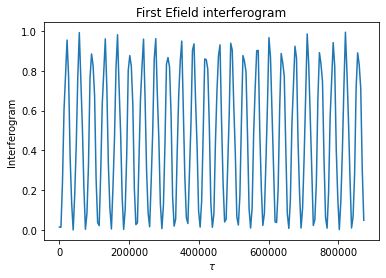

In [52]:
IntEfield.plot_interferogram(title='First Efield interferogram')

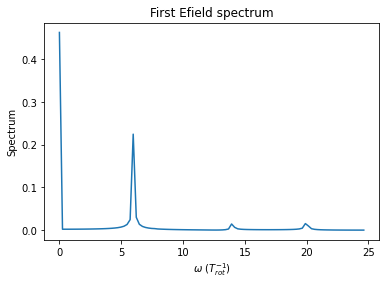

In [53]:
IntEfield.plot_spectrum(title='First Efield spectrum', scaleTrot=True)

Including efield

In [64]:
eps   = 0.00001

Get the ground state

In [65]:
H0 = Ut.H0(MgH['B'], n, full=True) + Ut.H_dip(eps, MgH['D'], n)
[Eigva, eigve] = H0.eigenstates()
istate = eigve[0] # Set initial state to ground state
istate.full()

array([[9.93206359e-01+0.j],
       [1.16294623e-01+0.j],
       [4.08451730e-03+0.j],
       [7.05686570e-05+0.j],
       [7.27596614e-07+0.j],
       [4.98913322e-09+0.j],
       [2.44045064e-11+0.j],
       [0.00000000e+00+0.j],
       [0.00000000e+00+0.j],
       [0.00000000e+00+0.j]])

In [66]:
Ppara.update(eps=eps)

In [67]:
IntEfield2 = In.PulsesEfieldInterferometry(Pulsepara=Ppara, molpara=MgH, time=time, istate=istate, dim=n, Name='Efield2')

In [68]:
IntEfield2.run_interferometry()

In [69]:
IntEfield2.get_spectrum()

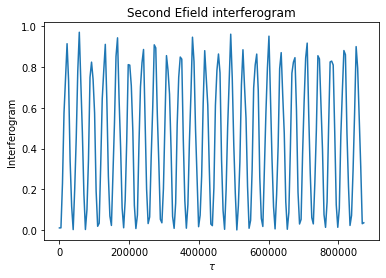

In [70]:
IntEfield2.plot_interferogram(title='Second Efield interferogram')

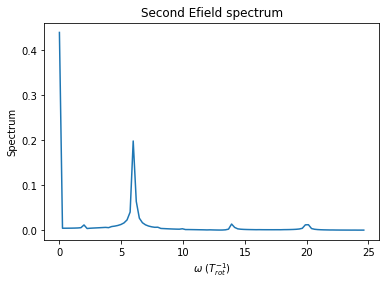

In [71]:
IntEfield2.plot_spectrum(title='Second Efield spectrum', scaleTrot=True)

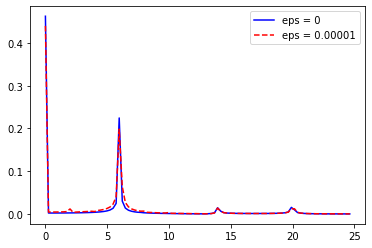

In [72]:
# Plotting the gaussian
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
ax.plot(IntEfield.omega*Trot, IntEfield.spectrum, color='blue', label='eps = 0')
ax.plot(IntEfield2.omega*Trot, IntEfield2.spectrum, '--', color='red', label='eps = 0.00001')
plt.legend(loc='upper right')
plt.show()

In [88]:
CaH = {'B': 2.15*10**(-5.), 'Da': 16.59, 'D': 2.38}
eps = 0.000001
Ppara.update(eps=eps)

In [89]:
H0 = Ut.H0(CaH['B'], n, full=True) + Ut.H_dip(eps, CaH['D'], n)
[Eigva, eigve] = H0.eigenstates()
istate = eigve[0] # Set initial state to ground state
istate.full()

array([[9.99490524e-01+0.j],
       [3.19155072e-02+0.j],
       [3.03979760e-04+0.j],
       [1.42174244e-06+0.j],
       [3.96530934e-09+0.j],
       [7.35221575e-12+0.j],
       [0.00000000e+00+0.j],
       [0.00000000e+00+0.j],
       [0.00000000e+00+0.j],
       [0.00000000e+00+0.j]])

In [90]:
IntEfield3 = In.PulsesEfieldInterferometry(Pulsepara=Ppara, molpara=CaH, time=time, istate=istate, dim=n, Name='Efield2 CaH')

In [91]:
IntEfield3.run_interferometry()

In [92]:
IntEfield3.get_spectrum()

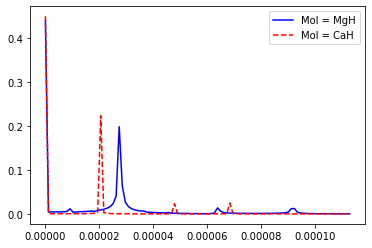

In [93]:
fig, ax = plt.subplots()
ax.plot(IntEfield2.omega, IntEfield2.spectrum, color='blue', label='Mol = MgH')
ax.plot(IntEfield3.omega, IntEfield3.spectrum, '--', color='red', label='Mol = CaH')
plt.legend(loc='upper right')
plt.show()

In [81]:
eps=0
Ppara.update(eps=eps)

In [82]:
H0 = Ut.H0(CaH['B'], n, full=True) + Ut.H_dip(eps, CaH['D'], n)
[Eigva, eigve] = H0.eigenstates()
istate = eigve[0] # Set initial state to ground state
istate.full()

array([[1.+0.j],
       [0.+0.j],
       [0.+0.j],
       [0.+0.j],
       [0.+0.j],
       [0.+0.j],
       [0.+0.j],
       [0.+0.j],
       [0.+0.j],
       [0.+0.j]])

In [83]:
IntEfield4 = In.PulsesEfieldInterferometry(Pulsepara=Ppara, molpara=CaH, time=time, istate=istate, dim=n, Name='Efield CaH')

In [84]:
IntEfield4.run_interferometry()

In [85]:
IntEfield4.get_spectrum()

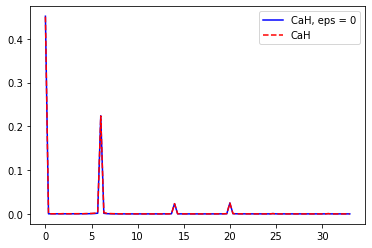

In [94]:
Trot = 2.*math.pi*CaH['B']**(-1.)
fig, ax = plt.subplots()
ax.plot(IntEfield4.omega*Trot, IntEfield4.spectrum, color='blue', label='CaH, eps = 0')
ax.plot(IntEfield3.omega*Trot, IntEfield3.spectrum, '--', color='red', label='CaH')
plt.legend(loc='upper right')
plt.show()